# Introduction
* The purpose of this project is to determine which region (out of three given regions) would be the optimal region to select in order to build a new well. Optimal conditions include to keep risk of loss at a minimum of less than 2.5% in addition to ensuring that the region is predicted to generate the highest amount of profit. 

* I will train 3 different Linear Regression models respective to each region to predict product volume of reserves. These models will then be utilized to calculate each regions average profit and subsequently assess risk proabability.  


# Data Preprocessing 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import preprocessing

In [2]:
region1=pd.read_csv('/datasets/geo_data_0.csv')
region2=pd.read_csv('/datasets/geo_data_1.csv')
region3=pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
region1

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
region1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
region1.shape


(100000, 5)

In [6]:
region2

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [7]:
region2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
region2.shape

(100000, 5)

In [9]:
region3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
region3.shape

(100000, 5)

* All three datasets are ready for model building 

In [11]:
region1

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [12]:
region1=region1.drop(["id"], axis=1)

In [13]:
region1

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


In [14]:
region1.isna().sum()

f0         0
f1         0
f2         0
product    0
dtype: int64

# TRAIN THE MODEL: REGION 1

In [15]:
features=region1.drop(["product"], axis=1)
target=region1["product"]

In [16]:
target.shape

(100000,)

In [17]:
features.shape

(100000, 3)

<AxesSubplot:>

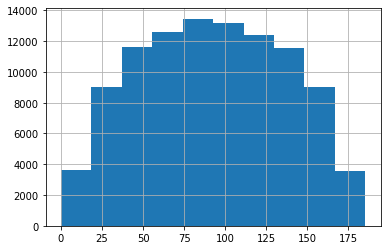

In [18]:
target.hist()

* Majority of wells in this region have a volume of reserves that fall between about 20-160 thousand barrels of oil.
Note: product — volume of reserves in the oil well (thousand barrels).

In [19]:
region1_train, region1_valid = train_test_split(region1, test_size=0.25, random_state=12345)


In [20]:
features_train = region1_train.drop(["product"], axis=1)
target_train = region1_train['product']
features_valid = region1_valid.drop(['product'], axis=1)
target_valid = region1_valid['product']


In [21]:
print("Training set size is", len(region1_train)/len(region1))
print("Validation set size is", len(region1_valid)/len(region1))


Training set size is 0.75
Validation set size is 0.25


In [22]:
scaler=StandardScaler()
scaler.fit(features_train)
features_valid=scaler.transform(features_valid)
print(features_train.shape)
print(features_valid.shape)

(75000, 3)
(25000, 3)


In [23]:
scaler=StandardScaler()
scaler.fit(features_train)
features_train=scaler.transform(features_train)
print(features_train.shape)

(75000, 3)


In [24]:
model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
mse = mean_squared_error(target_valid, predicted_valid)

print('Linear Regression')
print("Average volume of predicted reserves is in thousands", predicted_valid.mean())
print('MSE =', mse)
print('RMSE =', mse ** 0.5)


Linear Regression
Average volume of predicted reserves is in thousands 92.59256778438035
MSE = 1412.2129364399243
RMSE = 37.5794217150813


In [25]:
predicted_valid_constant=pd.Series(target_train.mean(), index=target_valid.index)
mse_constant=mean_squared_error(target_valid, predicted_valid_constant)
print('RMSE =', mse_constant ** 0.5)

RMSE = 44.289591053907365


* The resulting RMSE for the model in region1 is 65.312 (thousand barrels). This is rather high, especially when compared to the constant(mean) model above (44.289 thousand barrels). This indicates that the model 

# PREPARE REGION 2 FOR TRAINING

In [26]:

region2=region2.drop(["id"], axis=1)

In [27]:
region2

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...
99995,9.535637,-6.878139,1.998296,53.906522
99996,-10.160631,-12.558096,5.005581,137.945408
99997,-7.378891,-3.084104,4.998651,137.945408
99998,0.665714,-6.152593,1.000146,30.132364


# TRAIN THE MODEL: REGION2

In [28]:
features2=region2.drop(["product"], axis=1)
target2=region2["product"]

<AxesSubplot:>

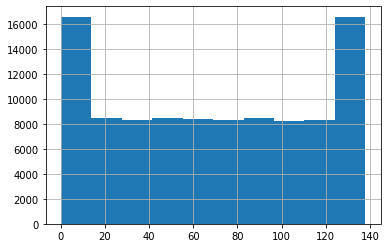

In [29]:
target2.hist()


In [30]:
print(target2.max())
print(target2.min())


137.94540774090564
0.0


* The distribiution of the target variable in the region2 dataset looks varies considerably from the region1 dataset. There does seem to be outliers in this dataset. 

* There is a high number that contain between 0-10 thousand barrels. In addition, a high number of reserves falls between 120-138 thousand barrels.

In [31]:
region2_train, region2_valid = train_test_split(region2, test_size=0.25, random_state=12345)


In [32]:
features_train2 = region2_train.drop(["product"], axis=1)
target_train2 = region2_train['product']
features_valid2 = region2_valid.drop(['product'], axis=1)
target_valid2 = region2_valid['product']


In [33]:
scaler=StandardScaler()
scaler.fit(features_train2)
features_valid2=scaler.transform(features_valid2)
features_train2=scaler.transform(features_train2)
print(features_train2.shape)
print(features_valid2.shape)

(75000, 3)
(25000, 3)


# TRAIN THE MODEL: REGION 2

In [34]:
model2 = LinearRegression()
model2.fit(features_train2, target_train2)
predicted_valid2 = model2.predict(features_valid2)
mse2 = mean_squared_error(target_valid2, predicted_valid2)

print('Linear Regression')
print("Average volume of predicted reserves is in thousands", predicted_valid2.mean())
print('MSE =', mse2)
print('RMSE =', mse2 ** 0.5)


Linear Regression
Average volume of predicted reserves is in thousands 68.728546895446
MSE = 0.7976263360391157
RMSE = 0.893099286775617


* The RMSE is much higher in region2 dataset compared to region1 dataset, but it is important to note that the average volume of reserves is also higher. I will compare to constant model for further analysis.

In [35]:
predicted_valid_constant2=pd.Series(target_train2.mean(), index=target_valid2.index)
mse_constant2=mean_squared_error(target_valid2, predicted_valid_constant2)
print('RMSE =', mse_constant2 ** 0.5)

RMSE = 46.02144533725462


* The constant model results in an RMSE of only 46.02, which indicates that this model predicts the target rather poorly. The large difference between the constant model RMSE and the actual model used might also imply that there are more outliers in this dataset as opposed to region1.

# PREPARE REGION 3 FOR TRAINING

In [36]:

region3=region3.drop(["id"], axis=1)

In [37]:
region3


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...
99995,-1.777037,1.125220,6.263374,172.327046
99996,-1.261523,-0.894828,2.524545,138.748846
99997,-1.199934,-2.957637,5.219411,157.080080
99998,-2.419896,2.417221,-5.548444,51.795253


In [38]:
features3=region3.drop(["product"], axis=1)
target3=region3["product"]

<AxesSubplot:>

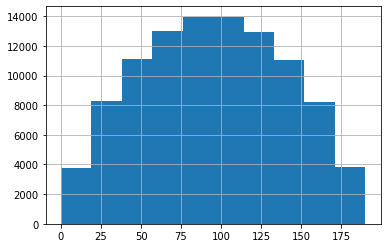

In [39]:
target3.hist()

* The distribution of the target variable here looks quite spread out, similar to region1. 

In [40]:
print(target3.max())
print(target3.min())

190.0298383433513
0.0


In [41]:
region3_train, region3_valid = train_test_split(region3, test_size=0.25, random_state=12345)


In [42]:
features_train3 = region3_train.drop(["product"], axis=1)
target_train3 = region3_train['product']
features_valid3 = region3_valid.drop(['product'], axis=1)
target_valid3 = region3_valid['product']


In [43]:
scaler=StandardScaler()
scaler.fit(features_train3)
features_valid3=scaler.transform(features_valid3)
features_train3=scaler.transform(features_train3)
print(features_train3.shape)
print(features_valid3.shape)

(75000, 3)
(25000, 3)


In [44]:
model3 = LinearRegression()
model3.fit(features_train3, target_train3)
predicted_valid3 = model3.predict(features_valid3)
mse3 = mean_squared_error(target_valid3, predicted_valid3)

print('Linear Regression')
print("Average volume of predicted reserves is in thousands", predicted_valid3.mean())
print('MSE =', mse3)
print('RMSE =', mse3 ** 0.5)


Linear Regression
Average volume of predicted reserves is in thousands 94.96504596800489
MSE = 1602.3775813236196
RMSE = 40.02970873393434


In [45]:
predicted_valid_constant3=pd.Series(target_train3.mean(), index=target_valid3.index)
mse_constant3=mean_squared_error(target_valid3, predicted_valid_constant3)
print('RMSE =', mse_constant3 ** 0.5)

RMSE = 44.90234968510566


* The Linear Regression model for Region3 resulted in the lowest (optimal) RMSE (47.36 thousand barrels) as compared to region1 and region2. In addition, it also differs by only 3 thousand barrels from the constant model, which is a small difference as compared to the previous 2 models for region 1 and 2.

# Minimum Volume of Reserves Calculation

* Below I will calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.

In [46]:
cost_per_well=500000
rev_per_unit=4500
print("Minimum Volume of reserves per well", cost_per_well / rev_per_unit)

Minimum Volume of reserves per well 111.11111111111111


* According to the given budget and revenue per well, in order to build a well with 0 loss and 0 profit, the minimum volume of reserves is 111.11 thousand barrels. 

* Taking a look at the three regions, we see that region 1 and region 3 have average volume reserves of about 77 and about 94 respectively, while region 2's average volume reserves per well exceeds this at 166 thousand barrels. 

# Profit Calculation Function

In [47]:
def profit_calc(target, predictions):
    pred_sorted= pd.Series(predictions).reset_index()[0].sort_values(ascending=False)
    points=target.reset_index(drop=True)[pred_sorted.index][:200]
    profit= (sum(points) * 4500) - (100000000) 
    return profit
    
   


In [48]:
region_1_profit=profit_calc(target_valid, predicted_valid)
region_1_profit

33208260.43139854

In [49]:
region_2_profit=profit_calc(target_valid2, predicted_valid2)
region_2_profit


24150866.966815516

In [50]:
region_3_profit=profit_calc(target_valid3, predicted_valid3)
region_3_profit


27103499.63599837

# Total Profit Per Region

In [51]:
print("Profit for top 200 wells for Region 1:", region_1_profit)
print("Profit for top 200 wells for Region 2:", region_2_profit)
print("Profit for top 200 wells for Region 3:", region_3_profit)

Profit for top 200 wells for Region 1: 33208260.43139854
Profit for top 200 wells for Region 2: 24150866.966815516
Profit for top 200 wells for Region 3: 27103499.63599837


* Below, I will perform the Bootstrapping Technique for the 95% Confidence Interval to determine the average profit.

# REGION 1 AVERAGE PROFIT CONFIDENCE INTERVAL

In [52]:
#5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.
state = np.random.RandomState(12345)
values = []
for i in range(1000):
    subsample = target_valid.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
    pred_subsample= pd.Series(predicted_valid).reset_index(drop=True)[subsample.index]
    values.append(profit_calc(subsample, pred_subsample))

mean_profit=pd.Series(values).mean()

#Confidence interval with 95% confidence    
lower = pd.Series(values).quantile(0.025)
upper = pd.Series(values).quantile(0.975)

print(lower)
print(upper)
print("The average profit for region one lies between", lower, "and", upper, "with 95% Confidence")
print("The Average Profit for Region 1 is:", mean_profit)
values=pd.Series(values)
risk_percent = ((values[values < 0]).count() / len(values)) * (100)
print("The total risk probability for region 1 is", risk_percent,"%")

-1112155.4589049455
9097669.415534215
The average profit for region one lies between -1112155.4589049455 and 9097669.415534215 with 95% Confidence
The Average Profit for Region 1 is: 3961649.848023716
The total risk probability for region 1 is 6.9 %


# REGION 2 AVERAGE PROFIT CONFIDENCE INTERVAL 

In [53]:
state = np.random.RandomState(12345)
values = []
for i in range(1000):
    subsample = target_valid2.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
    pred_subsample= pd.Series(predicted_valid2).reset_index(drop=True)[subsample.index]
    values.append(profit_calc(subsample, pred_subsample))

mean_profit=pd.Series(values).mean()

#Confidence interval with 95% confidence    
lower = pd.Series(values).quantile(0.025)
upper = pd.Series(values).quantile(0.975)

print(lower)
print(upper)
print("The average profit for region one lies between", lower, "and", upper, "with 95% Confidence")
print("The Average Profit for Region 2 is:", mean_profit)
values=pd.Series(values)
risk_percent = (len(values[values < 0]) / len(values)) * (100)
print("The total risk probability for region 3 is", risk_percent,"%")

338205.0939900089
8522894.538660616
The average profit for region one lies between 338205.0939900089 and 8522894.538660616 with 95% Confidence
The Average Profit for Region 2 is: 4560451.057866825
The total risk probability for region 3 is 1.5 %


# REGION 3 AVERAGE PROFIT CONFIDENCE INTERVAL

In [54]:
state = np.random.RandomState(12345)
values = []
for i in range(1000):
    subsample = target_valid3.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
    pred_subsample= pd.Series(predicted_valid3).reset_index(drop=True)[subsample.index]
    values.append(profit_calc(subsample, pred_subsample))

mean_profit=pd.Series(values).mean()

#Confidence interval with 95% confidence    
lower = pd.Series(values).quantile(0.025)
upper = pd.Series(values).quantile(0.975)

print(lower)
print(upper)
print("The average profit for region one lies between", lower, "and", upper, "with 95% Confidence")
print("The Average Profit for Region 3 is:", mean_profit)
values=pd.Series(values)
risk_percent = (len(values[values < 0]) / len(values)) * (100)
print("The total risk probability for region 3 is", risk_percent,"%")

-1633504.1339560263
9503595.749237984
The average profit for region one lies between -1633504.1339560263 and 9503595.749237984 with 95% Confidence
The Average Profit for Region 3 is: 4044038.665683574
The total risk probability for region 3 is 7.6 %


# Conclusion

* Based on the results above, Region 3 presents the highest probability of risk, at 7.6%.. From the 3 regions, the regions with the lowest possible risk are region 1 and 2, with 6.9% and 1.5% risk probability respectively. Of these two regions, we find that region 2 has the highest profit on average (4560451.05 USD). 

* For these reason we should select region 2 to build the new well as it poses the least possible risk in combination with the highest average profit. 